In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Nicholas Brown\anaconda3\envs\TF2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nicholas Brown\anaconda3\envs\TF2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nicholas Brown\anaconda3\envs\TF2\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nicholas Brown\anacond

In [3]:
observations=100000
xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))


In [4]:
generated_inputs=np.column_stack((xs,zs))

In [5]:
generated_inputs

array([[ 5.91771422, -4.90557948],
       [-0.17210718, -5.16914481],
       [-3.60913108, -0.01593008],
       ...,
       [-9.76316082, -0.99686262],
       [-1.42178188, -0.10202191],
       [-5.51847153,  3.62075272]])

In [6]:
noise=np.random.uniform(-1,1,(observations,1))

In [7]:
generated_targets=2*xs -3*zs +5 + noise

In [8]:
np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

In [19]:
training_data=np.load('TF_intro.npz')

In [20]:
input_size= 2
output_size= 1

model= tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer='sgd',loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)



Train on 100000 samples
Epoch 1/100
100000/100000 - 4s - loss: 0.6311
Epoch 2/100
100000/100000 - 3s - loss: 0.3433
Epoch 3/100
100000/100000 - 3s - loss: 0.3430
Epoch 4/100
100000/100000 - 3s - loss: 0.3440
Epoch 5/100
100000/100000 - 4s - loss: 0.3438
Epoch 6/100
100000/100000 - 3s - loss: 0.3430
Epoch 7/100
100000/100000 - 3s - loss: 0.3437
Epoch 8/100
100000/100000 - 3s - loss: 0.3438
Epoch 9/100
100000/100000 - 3s - loss: 0.3437
Epoch 10/100
100000/100000 - 4s - loss: 0.3434
Epoch 11/100
100000/100000 - 3s - loss: 0.3436
Epoch 12/100
100000/100000 - 3s - loss: 0.3439
Epoch 13/100
100000/100000 - 3s - loss: 0.3440
Epoch 14/100
100000/100000 - 3s - loss: 0.3431
Epoch 15/100
100000/100000 - 4s - loss: 0.3432
Epoch 16/100
100000/100000 - 3s - loss: 0.3435
Epoch 17/100
100000/100000 - 3s - loss: 0.3436
Epoch 18/100
100000/100000 - 3s - loss: 0.3438
Epoch 19/100
100000/100000 - 3s - loss: 0.3437
Epoch 20/100
100000/100000 - 4s - loss: 0.3433
Epoch 21/100
100000/100000 - 3s - loss: 0.343

In [21]:
model.layers[0].get_weights()

[array([[ 1.9801999],
        [-3.0099328]], dtype=float32),
 array([4.995215], dtype=float32)]

In [22]:
weights=model.layers[0].get_weights()[0]
biases=model.layers[0].get_weights()[1]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'


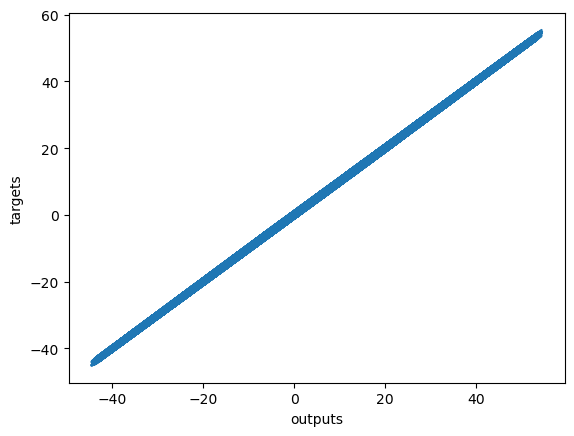

In [23]:
plt.plot(model.predict_on_batch(training_data['inputs']),training_data['targets'])
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

Customizing a Tensorflow 2 Model

In [9]:
training_data=np.load('TF_intro.npz')

In [17]:
input_size= 2
output_size= 1

model= tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1))
])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=custom_optimizer,loss=tf.keras.losses.Huber())

model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)


Train on 100000 samples
Epoch 1/100
100000/100000 - 5s - loss: 4.7203
Epoch 2/100
100000/100000 - 4s - loss: 0.7676
Epoch 3/100
100000/100000 - 6s - loss: 0.1720
Epoch 4/100
100000/100000 - 6s - loss: 0.1665
Epoch 5/100
100000/100000 - 4s - loss: 0.1665
Epoch 6/100
100000/100000 - 6s - loss: 0.1665
Epoch 7/100
100000/100000 - 4s - loss: 0.1665
Epoch 8/100
100000/100000 - 4s - loss: 0.1665
Epoch 9/100
100000/100000 - 5s - loss: 0.1665
Epoch 10/100
100000/100000 - 4s - loss: 0.1665
Epoch 11/100
100000/100000 - 6s - loss: 0.1665
Epoch 12/100
100000/100000 - 4s - loss: 0.1665
Epoch 13/100
100000/100000 - 4s - loss: 0.1665
Epoch 14/100
100000/100000 - 5s - loss: 0.1665
Epoch 15/100
100000/100000 - 4s - loss: 0.1665
Epoch 16/100
100000/100000 - 4s - loss: 0.1665
Epoch 17/100
100000/100000 - 6s - loss: 0.1665
Epoch 18/100
100000/100000 - 5s - loss: 0.1665
Epoch 19/100
100000/100000 - 4s - loss: 0.1665
Epoch 20/100
100000/100000 - 4s - loss: 0.1665
Epoch 21/100
100000/100000 - 4s - loss: 0.166

In [15]:
weights=model.layers[0].get_weights()[0]
biases=model.layers[0].get_weights()[1]

In [16]:
weights

array([[ 1.9962057],
       [-3.0001552]], dtype=float32)

In [13]:
biases

array([4.9949865], dtype=float32)